In [1]:
import os

In [2]:
os.chdir("../")
os.getcwd()

'/home/adam/Workspace/personal/unihack/fast-form'

In [6]:
import numpy as np
import pandas as pd

train_db = pd.read_csv("training_data/emnist-balanced-train.csv")
test_db  = pd.read_csv("training_data/emnist-balanced-test.csv")

# train model

In [7]:
from keras.utils import np_utils
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.models import model_from_json

num_classes = 47
y_train = train_db.iloc[:,0]
y_train = np_utils.to_categorical(y_train, num_classes)
print ("y_train:", y_train.shape)

x_train = train_db.iloc[:,1:]
x_train = x_train.astype('float32')
x_train /= 255
print ("x_train:",x_train.shape)

inp = Input(shape=(784,))
hidden_1 = Dense(1024, activation='relu')(inp)
dropout_1 = Dropout(0.2)(hidden_1)
out = Dense(num_classes, activation='softmax')(hidden_1) 
model = Model(input=inp, output=out)

model.compile(loss='categorical_crossentropy', # using the cross-entropy loss function
              optimizer='adam', # using the Adam optimiser
              metrics=['accuracy']) # reporting the accuracy

model.fit(x_train, y_train, # Train the model using the training set...
          batch_size=512, nb_epoch=10,
          verbose=1, validation_split=0.1) # ...holding out 10% of the data for validation

y_test = test_db.iloc[:,0]
y_test = np_utils.to_categorical(y_test, num_classes)
print ("y_test:", y_test.shape)

x_test = test_db.iloc[:,1:]
x_test = x_test.astype('float32')
x_test /= 255
print ("x_test:",x_train.shape)

print(model.evaluate(x_test, y_test, verbose=1)) # Evaluate the trained model on the test set!

y_train: (112799, 47)
x_train: (112799, 784)
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.



Train on 101519 samples, validate on 11280 samples
Epoch 1/10
101519/101519 [==============================] - 9s 93us/step - loss: 1.2407 - accuracy: 0.6589 - val_loss: 0.8499 - val_accuracy: 0.7462
Epoch 2/10
101519/101519 [==============================] - 10s 96us/step - loss: 0.7157 - accuracy: 0.7868 - val_loss: 0.6585 - val_accuracy: 0.7908
Epoch 3/10
101519/101519 [==============================] - 8s 83us/step - loss: 0.5633 - accuracy: 0.8247 - val_loss: 0.5617 - val_accuracy: 0.8179
Epoch 4/10
101519/101519 [==============================] - 10s 100us/step - loss: 0.4867 - accuracy: 0.8445 - val_loss: 0.5280 - val_accuracy: 0.8251
Epoch 5/10
101519/101519 [==============================] - 8s 80us/step - loss: 0.4345 - accuracy: 0.8568 - val_loss: 0.5101 - val_accuracy: 0.8316
Epoch 6/10
101519/101519 [==============================] - 8s 80us/step - loss: 0.3969 - accuracy: 0.8672 - val_loss: 0.4897 - val_accuracy: 0.8326
Epoch 7/10
101519/101519 [=========================

In [8]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 84.86%


## model save/load

In [9]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
 
# serialize model to JSON
model_json = model.to_json()
with open("model_data/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_data/model.h5")
print("Saved model to disk")
 
# later...
 
# load json and create model
json_file = open('model_data/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_data/model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', # using the cross-entropy loss function
              optimizer='adam', # using the Adam optimiser
              metrics=['accuracy']) # reporting the accuracy


scores = model.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], scores[1]*100))

accuracy: 84.86%
Saved model to disk
Loaded model from disk
accuracy: 84.86%


# predictions

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
import PIL.Image
from IPython.display import Image

In [11]:
with open("training_data/emnist-balanced-mapping.txt") as f:
    s = f.read()[:-1] # remove last char \n
a = [l.split(" ") for l in s.split("\n")]
res_mapper = {int(l[0]): chr(int(l[1])) for l in a}
print(res_mapper)

{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'd', 39: 'e', 40: 'f', 41: 'g', 42: 'h', 43: 'n', 44: 'q', 45: 'r', 46: 't'}


In [12]:
def display_char(i):
    label = test_db.iloc[i].values[0]
    char = res_mapper.get(label)
    print("=============")
    print(f"label: {char}")
    
    img = test_db.iloc[i].values[1:]
    
    pred = model.predict(np.array([img]))
    pred_val = res_mapper.get(pred[0].argmax())
    print(f"Prediction: {pred_val}")
    
    
    img = img.astype('uint8') 
    img = img.reshape((28,28))
    img = img.transpose()
    display(PIL.Image.fromarray(img))

In [13]:
# invert
# transpose

In [14]:
for i in range (3):
    display_char(i)

label: e
Prediction: e


NameError: name 'PIL' is not defined

# preprocessing


In [48]:
import pickle
# with open("test.txt", "wb") as fp:   #Pickling
#     pickle.dump(l, fp)

with open("./test/example_forms/julinka_dotaznik/example_letters.pickle", "rb") as fp:   # Unpickling
        b = pickle.load(fp)

len(b)


25

In [53]:
img = b[20]
display(PIL.Image.fromarray(img))

In [54]:
img.shape

(40, 16)

In [52]:
print('Original Dimensions : ',img.shape)

Original Dimensions :  (40, 16)


In [41]:
x = 26/59
x

0.4406779661016949

In [42]:
59*x

26.0

In [43]:
scale = 28/max(img.shape)

In [45]:
img.shape

(59, 34)

In [44]:
imgc = cv2.copyMakeBorder(img,1,1,1,1,cv2.BORDER_CONSTANT,value=[255,255,255])
imgc.shape

(61, 36)

Original Dimensions :  (59, 34)
Resized Dimensions :  (28, 25)


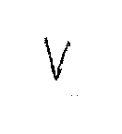

In [46]:
import cv2
 
# img = cv2.imread('/home/img/python.png', cv2.IMREAD_UNCHANGED)
 
print('Original Dimensions : ',img.shape)

img = cv2.copyMakeBorder(img,37,38,44,44,cv2.BORDER_CONSTANT,value=[255,255,255])

scale = 28/max(img.shape)
width = int(img.shape[1] * scale)
height = int(img.shape[0] * scale)
dim = (width, height)
# resize image

resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',resized.shape)
 

display(PIL.Image.fromarray(img))

In [276]:
img = b[23]
print(img.shape)
img = img.ravel()
img = 255-img
img.shape


(59, 34)


(2006,)

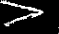

In [272]:
img = img.astype('uint8') 
img = img.reshape((59, 34))
img = img.transpose()
display(PIL.Image.fromarray(img))

In [263]:
    pred = model.predict(np.array([img]))
    pred_val = res_mapper.get(pred[0].argmax())
    print(f"Prediction: {pred_val}")

ValueError: Error when checking input: expected input_1 to have shape (784,) but got array with shape (1892,)

In [ ]:
def display_char(i):
    label = test_db.iloc[i].values[0]
    char = res_mapper.get(label)
    print("=============")
    print(f"label: {char}")
    
    img = test_db.iloc[i].values[1:]
    
    pred = model.predict(np.array([img]))
    pred_val = res_mapper.get(pred[0].argmax())
    print(f"Prediction: {pred_val}")
    
    
    img = img.astype('uint8') 
    img = img.reshape((28,28))
    img = img.transpose()
    display(PIL.Image.fromarray(img))